In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [0]:
# para gerar o grafico no browser
%matplotlib inline

In [128]:
# local dos dados e modifica o diretorio
#path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
#os.chdir(path)
!git clone http://github.com/rondinelliml/trabalho
%cd trabalho
!ls  

Cloning into 'trabalho'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.
/content/trabalho/trabalho/trabalho/trabalho/trabalho
'dados artigo.xlsx'		  RBFNN_tranning_data1.csv
'RBFNN error analysis data.csv'  'tranning data transp.csv'
 RBFNN_error_analysis_data.csv


In [129]:
# leitura dos dados
DAT=pd.read_csv("RBFNN_tranning_data1.csv",sep='\;')
print(DAT.head())
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

     epp    epw     pp     vp    upp    upw   alfa      p
0  0.069  0.085  29.39  0.197  0.113  2.000  37.18  13.72
1  0.059  0.088  25.91  0.237  0.019  2.000  27.12  12.74
2  0.017  0.016  25.76  0.217  0.118  2.000  37.27  11.78
3  0.070  0.024  24.55  0.415  0.139  0.682  34.56  11.27
4  0.000  0.036  23.03  0.157  0.091  1.000   0.00   0.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [130]:
# separa as colunas de interesse
Index=range(8)
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

     epp    epw     pp     vp    upp    upw   alfa      p
0  0.069  0.085  29.39  0.197  0.113  2.000  37.18  13.72
1  0.059  0.088  25.91  0.237  0.019  2.000  27.12  12.74
2  0.017  0.016  25.76  0.217  0.118  2.000  37.27  11.78
3  0.070  0.024  24.55  0.415  0.139  0.682  34.56  11.27
4  0.000  0.036  23.03  0.157  0.091  1.000   0.00   0.00


In [0]:
# funcao normatiza dados, intervalo de -1 a 1)
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [133]:
# separa os dados em normatizados e originais
DAT_OLD=[]
# Guarda os dados antes de serem normatizados, para que não sejam perdidos
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(DAT.head())
print('================================================================')
print(DAT_OLD.head())

    epp   epw        pp     vp       upp    upw      alfa         p
0  0.38  0.70  0.918667 -0.515  0.471429  0.500  0.610221  0.879452
1  0.18  0.76  0.454667 -0.315 -0.871429  0.500  0.174534  0.745205
2 -0.66 -0.68  0.434667 -0.415  0.542857  0.500  0.614119  0.613699
3  0.40 -0.52  0.273333  0.575  0.842857 -0.818  0.496752  0.543836
4 -1.00 -0.28  0.070667 -0.715  0.157143 -0.500 -1.000000 -1.000000
     epp    epw     pp     vp    upp    upw   alfa      p
0  0.069  0.085  29.39  0.197  0.113  2.000  37.18  13.72
1  0.059  0.088  25.91  0.237  0.019  2.000  27.12  12.74
2  0.017  0.016  25.76  0.217  0.118  2.000  37.27  11.78
3  0.070  0.024  24.55  0.415  0.139  0.682  34.56  11.27
4  0.000  0.036  23.03  0.157  0.091  1.000   0.00   0.00


In [134]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.75,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
#train e test possui tanto x (entrada/independente) quanto y (saida/dependente)
print(train.head())
print("===================================================================")
print(train.shape[0]) #mostrar o numero de linhas
print("===================================================================")
print(test.head())
print("===================================================================")
print(test.shape[0])

     epp   epw        pp    vp       upp    upw      alfa         p
84 -0.14 -0.40 -0.474667  1.00  0.457143 -0.051 -1.000000 -1.000000
19 -0.48 -0.96 -0.152000 -0.01  0.314286 -0.798  0.597228  0.369863
50  0.06  0.08 -0.838667  0.11 -1.000000 -0.374  0.023387  0.086301
44 -0.36  0.44 -0.232000  0.98 -0.500000 -0.354  0.165440  0.356164
20 -0.18 -0.12 -0.434667 -0.78  0.657143 -0.838  1.000000  0.212329
75
    epp   epw        pp     vp       upp    upw      alfa         p
0  0.38  0.70  0.918667 -0.515  0.471429  0.500  0.610221  0.879452
1  0.18  0.76  0.454667 -0.315 -0.871429  0.500  0.174534  0.745205
3  0.40 -0.52  0.273333  0.575  0.842857 -0.818  0.496752  0.543836
5  0.08  0.40  0.797333  0.800  0.885714 -0.500  0.694240  0.778082
9 -0.06  0.98  0.252000 -0.735  0.014286 -0.500 -1.000000 -1.000000
25


In [135]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3,4,5]]
x_test=test.iloc[:,[0,1,2,3,4,5]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3,4,5]]
print(x_test.head())
print('================================================================')
print(x_train.head())
print('================================================================')
print(X_OLD.head())

    epp   epw        pp     vp       upp    upw
0  0.38  0.70  0.918667 -0.515  0.471429  0.500
1  0.18  0.76  0.454667 -0.315 -0.871429  0.500
3  0.40 -0.52  0.273333  0.575  0.842857 -0.818
5  0.08  0.40  0.797333  0.800  0.885714 -0.500
9 -0.06  0.98  0.252000 -0.735  0.014286 -0.500
     epp   epw        pp    vp       upp    upw
84 -0.14 -0.40 -0.474667  1.00  0.457143 -0.051
19 -0.48 -0.96 -0.152000 -0.01  0.314286 -0.798
50  0.06  0.08 -0.838667  0.11 -1.000000 -0.374
44 -0.36  0.44 -0.232000  0.98 -0.500000 -0.354
20 -0.18 -0.12 -0.434667 -0.78  0.657143 -0.838
     epp    epw     pp     vp    upp    upw
0  0.069  0.085  29.39  0.197  0.113  2.000
1  0.059  0.088  25.91  0.237  0.019  2.000
2  0.017  0.016  25.76  0.217  0.118  2.000
3  0.070  0.024  24.55  0.415  0.139  0.682
4  0.000  0.036  23.03  0.157  0.091  1.000


In [136]:
# obtem as variaveis dependentes (treino e teste)
Index=[6,7]
Y_OLD=DAT_OLD.iloc[:,Index]
print(Y_OLD.head())

Index=[6] #alfa
Y_OLD_alfa=DAT_OLD.iloc[:,Index]
y_train_alfa=train.iloc[:,Index]
y_test_alfa=test.iloc[:,Index]

Index=[7] #p
Y_OLD_p=DAT_OLD.iloc[:,Index]           
y_train_p=train.iloc[:,Index]
y_test_p=test.iloc[:,Index]

print(y_train_alfa.head())
print(y_train_p.head())
print('================================================================')
print(y_test_alfa.head())
print(y_test_p.head())
print('================================================================')
print(Y_OLD.head())
print(Y_OLD_alfa.head())
print(Y_OLD_p.head())

    alfa      p
0  37.18  13.72
1  27.12  12.74
2  37.27  11.78
3  34.56  11.27
4   0.00   0.00
        alfa
84 -1.000000
19  0.597228
50  0.023387
44  0.165440
20  1.000000
           p
84 -1.000000
19  0.369863
50  0.086301
44  0.356164
20  0.212329
       alfa
0  0.610221
1  0.174534
3  0.496752
5  0.694240
9 -1.000000
          p
0  0.879452
1  0.745205
3  0.543836
5  0.778082
9 -1.000000
    alfa      p
0  37.18  13.72
1  27.12  12.74
2  37.27  11.78
3  34.56  11.27
4   0.00   0.00
    alfa
0  37.18
1  27.12
2  37.27
3  34.56
4   0.00
       p
0  13.72
1  12.74
2  11.78
3  11.27
4   0.00


In [0]:
Neuron=8

In [0]:
# define a rede neural alfa
clf_alfa = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [0]:
# define a rede neural p
clf_p = MLPRegressor(solver='lbfgs',activation='relu',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [140]:
# treina a rede neural alfa
clf_alfa.fit(x_train,y_train_alfa)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=8, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [141]:
# treina a rede neural p
clf_p.fit(x_train, y_train_p)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=8, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [142]:
# usa a rede neural treina em calculos para treino e teste 
# predizer os dados de saida (y) tanto para traino quanto para teste
# pois quero no gráfico essas duas informações
y_calc_train=clf_alfa.predict(x_train)
y_calc_test=clf_alfa.predict(x_test)
#print(y_calc_train[:,:])
print(y_calc_test.shape[0])

25


In [143]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(Y_OLD_alfa)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
print(y_calc_train.head())
print(y_calc_test.shape[0])

       alfa
0 -0.840209
1  0.669720
2 -0.066845
3  0.115372
4  0.961761
25


In [144]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD_alfa)
y_calc_test=Original(y_calc_test,Y_OLD_alfa)
print(y_calc_test.head())
print(y_calc_test.shape[0])

print('================================================================')
print(y_calc_train.head())


        alfa
0  28.086771
1   1.668911
2  28.151715
3  43.898507
4  54.218314
25
        alfa
0   3.689582
1  38.553841
2  21.546541
3  25.753941
4  45.297055


In [145]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train_alfa,Y_OLD_alfa)
test=Original(y_test_alfa,Y_OLD_alfa)
print(train.shape[0])
print('===================================================================')
print(test.shape[0])

75
25


In [146]:
# escolhe uma das resposta para fazer o grafico (alfa-treino)
alfa_obs_train=[]
alfa_calc_train=[]
alfa_calc_train=y_calc_train['alfa'].copy()
alfa_obs_train=train['alfa'].copy()
print(alfa_calc_test.head())
print(alfa_calc_train.shape[0])
print(alfa_obs_train.shape[0])
print(alfa_obs_test.shape[0])
print(alfa_calc_test.shape[0])

0    38.334655
1    38.496897
2    22.802553
3    45.325955
4    24.175206
Name: alfa, dtype: float64
75
75
25
25


In [147]:
# escolhe uma das resposta para fazer o grafico (alfa-teste)
alfa_obs_test=[]
alfa_calc_test=[]
alfa_calc_test=y_calc_test['alfa'].copy()
alfa_obs_test=test['alfa'].copy()
print(alfa_calc_test.head())
print(alfa_calc_test.shape[0])
print(alfa_obs_test.shape[0])

0    28.086771
1     1.668911
2    28.151715
3    43.898507
4    54.218314
Name: alfa, dtype: float64
25
25


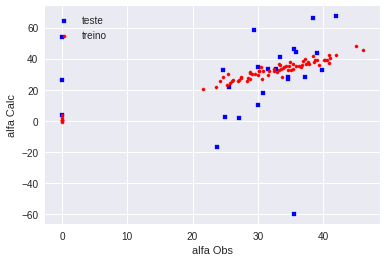

In [148]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 

ax1.scatter(alfa_obs_test,alfa_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(alfa_obs_train,alfa_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('alfa Calc')
plt.xlabel('alfa Obs')
plt.show()

In [0]:
#from é usado para carregar apenas uma função de uma biblioteca
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [150]:
mse=mean_squared_error(alfa_obs_test,alfa_calc_test)
print("MSE teste=",mse)
R2=r2_score(alfa_obs_test,alfa_calc_test)
print("R^2 teste=",R2)

MSE teste= 758.0747041572275
R^2 teste= -4.599850867746769


In [151]:
mse=mean_squared_error(alfa_obs_train,alfa_calc_train)
print("MSE treino=",mse)
R2=r2_score(alfa_obs_train,alfa_calc_train)
print("R^2 treino=",R2)

MSE treino= 3.7597972473396037
R^2 treino= 0.9687976408482007


In [152]:
#variavel Sinkage
p_calc_train=y_calc_train['Sinkage'].copy()
p_obs_train=train['Sinkage'].copy()
p_calc_test=y_calc_test['Sinkage'].copy()
p_obs_test=test['Sinkage'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(p_obs_test,p_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(p_obs_train,p_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Sinkage Calc')
plt.xlabel('Sinkage Obs')
plt.show()
mse=mean_squared_error(p_obs_test,p_calc_test)
print("MSE teste=",mse)
R2=r2_score(p_obs_test,p_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(p_obs_train,p_calc_train)
print("MSE treino=",mse)
R2=r2_score(p_obs_train,p_calc_train)
print("R^2 treino=",R2)

KeyError: ignored

In [0]:
#variavel Trim
resist_calc_train=y_calc_train['Trim'].copy()
resist_obs_train=train['Trim'].copy()
resist_calc_test=y_calc_test['Trim'].copy()
resist_obs_test=test['Trim'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Trim Calc')
plt.xlabel('Trim Obs')
plt.show()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

In [0]:
#variavel Power
resist_calc_train=y_calc_train['Power'].copy()
resist_obs_train=train['Power'].copy()
resist_calc_test=y_calc_test['Power'].copy()
resist_obs_test=test['Power'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)